0.7859647855430236


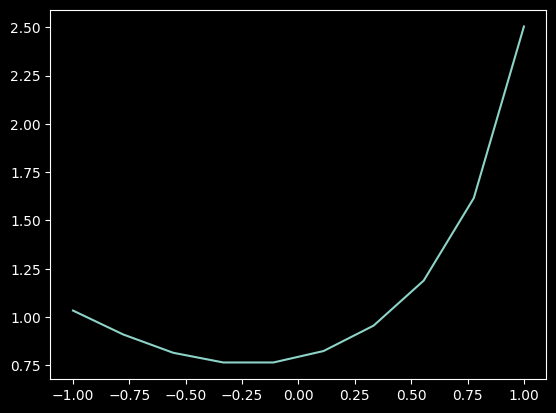

In [1]:
from optimizer.momentum import Momentum
%load_ext autoreload
%autoreload 2

import random

import numpy as np
import matplotlib.pyplot as plt

NUMBER_OF_COEFFS = 8
random.seed(42)
coeffs = np.random.random(NUMBER_OF_COEFFS)
print(np.polyval(coeffs, 0))

indices = np.linspace(-1, 1, 10)
values = np.apply_along_axis(lambda x: np.polyval(coeffs, x), 0, indices)

plt.plot(indices, values)
plt.show()

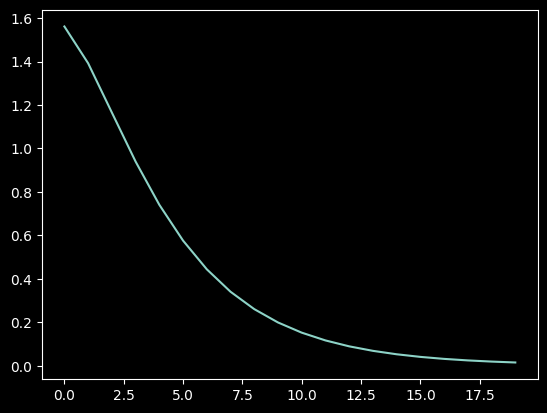

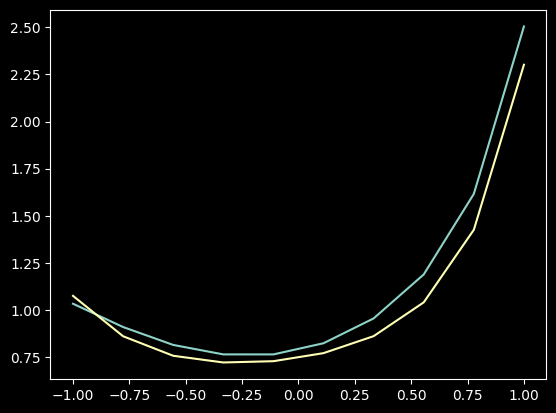

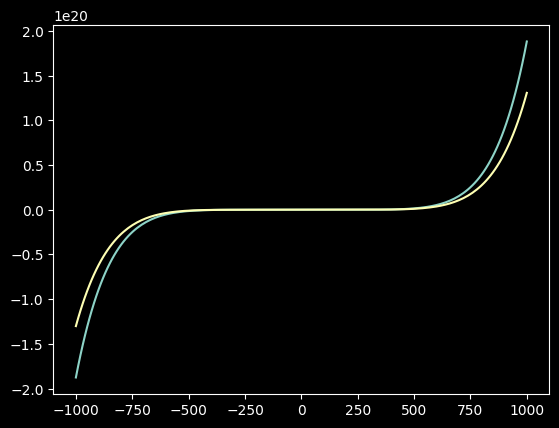

[0.13037476] [0.2635215] [0.13833562] [0.29845977] [0.15387429] [0.38095225] [0.19049047] [0.74508803]
0.18783606450906487 0.2751064095412433 0.09689482501678048 0.050743891103225414 0.18652658400305644 0.6568578605862408 0.2641827350757465 0.7859647855430236


In [17]:
from poly.polynomial import compute_polynomial
from loss.mse import mse_loss
from automatic_diff_engine.tensor import Tensor

params = [Tensor(0) for i in range(NUMBER_OF_COEFFS)]
optimizer = Momentum(
    parameters=params,
    learning_rate = 2e-2,
    beta=0.5
)

losses = []
epochs = 20
for epoch in range(epochs):
    optimizer.zero_grad()
    x = Tensor(indices, requires_grad=False)
    y = Tensor(values, requires_grad=False)

    y_pred = compute_polynomial(params, x)
    loss = mse_loss(y_pred, y)

    loss.backward()
    optimizer.step()

    losses.append(loss.value)

params_value = [p.value for p in params]


plt.plot(losses)
plt.show()

plt.plot(indices, values)
plt.plot(indices, [np.polyval(params_value, x) for x in indices])
plt.show()

extended_indices = np.linspace(-1000, 1000, 200)
extended_values = np.polyval(coeffs, extended_indices)
plt.plot(extended_indices, extended_values)
plt.plot(extended_indices, [np.polyval(params_value, x) for x in extended_indices])
plt.show()

print(*[p.value for p in params])
print(*coeffs)